# Multiple dice rolling simulator
This quick script simulates rolling any number (N) of M-sided dice, then plots the distribution of rolls

### Load packages

In [ ]:
# First import librarires
# numpy will be used for our random number generator, and for quickly bucketing the histogram
# matplotlib is for plotting the histogram

import numpy as np
import matplotlib.pyplot as plt

### Define helpers

In [2]:
# Setup a default random number generator from numpy
# since no seed is specified, a random seed will be pulled fresh from the OS
rng = np.random.default_rng()

In [4]:
# Helper to roll the dice
# input is: number of desired rolls, the number of dice being used, and (optional) number of sides for each dice
# ouptut is: n x m array with n being the number of dice and m being the number of rolls

def roll_dice(n_throws, n_dice, n_sides=6):
    result = []
    for i in range(n_dice):
        # here rng.integers calls the random number generator to pull integers from a uniform distribution
        result.append(rng.integers(low = 1, high = n_sides, size = n_throws, endpoint=True))
    
    return result

In [15]:
# Let's test the dice roller

n_throws = 10
n_dice = 2
# here we can leave out 'n_sides' since we specified a default in the function definition
dice_rolls = roll_dice(n_throws, n_dice)

# let's inspect the output.
# we expect a 2x10 array (2 dice, rolled 10 times each) of values ranging 1 to 6 (since we are rolling a d6)
# Note: each time you re-run this cell new rolls will be generated
print(dice_rolls)

[array([1, 4, 4, 5, 1, 4, 1, 3, 5, 1]), array([6, 2, 6, 4, 2, 2, 4, 5, 3, 4])]


In [16]:
# Helper to add the dice rolls together
# input is a j x i array with j being the number of dice and i being the number of throws
# output is a 1 x i array
def sum_throws(roll_array):
    n_dice = len(roll_array)
    result = []
    for i in range(len(roll_array[0])):
        this_roll = 0
        for j in range(n_dice):
            this_roll += roll_array[j][i]
        result += [this_roll]
    
    return result

In [19]:
# Let's test the sum_throws helper
n_throws = 10
n_dice = 2
total = sum_throws(roll_dice(n_throws, n_dice))

# Let's inspec the output
# we expect a 1 x 10 array of values ranging from 2 to 12
print(total)

[10, 9, 12, 8, 4, 5, 9, 6, 4, 6]


In [28]:
# Let's define a helper to create histograms quickly
# input will be initial parameters
# no ouput returned, but it will show a plot

def quick_dice_histo(n_rolls, n_dice, n_sides):
    max_val = n_dice * n_sides
    
    # generate the dice rolls
    samples = sum_throws(roll_dice(n_rolls, n_dice, n_sides))
    
    # bucket rolls into histogram
    histo, edges = np.histogram(samples, bins=np.arange(1,(max_val + 2)))
    
    # plot histogram
    plt.bar(edges[:max_val], histo)
    plt.show()

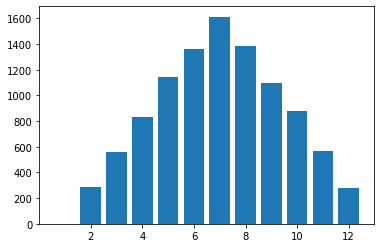

In [31]:
quick_dice_histo(10000, 2, 6)

### Analyzing different distributions

In [33]:
# 1xd6
quick_dice_histo(10000, 1, 6)

In [34]:
# 2xd6
quick_dice_histo(10000, 2, 6)

In [38]:
# 3xd6
quick_dice_histo(100000, 3, 6)

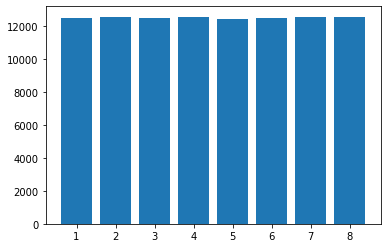

In [40]:
# 1xd8
quick_dice_histo(100000, 1, 8)

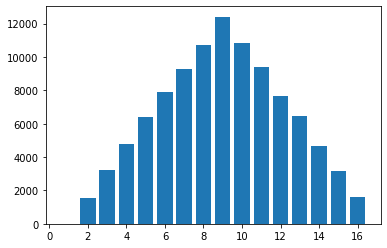

In [41]:
# 2xd8
quick_dice_histo(100000, 2, 8)

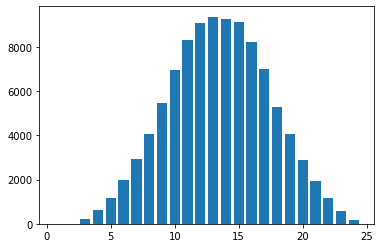

In [42]:
# 3xd8
quick_dice_histo(100000, 3, 8)

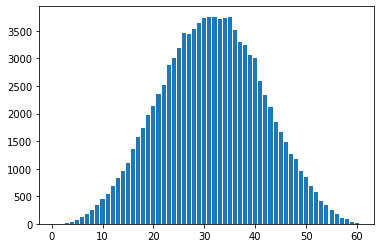

In [43]:
# 3xd20
quick_dice_histo(100000, 3, 20)

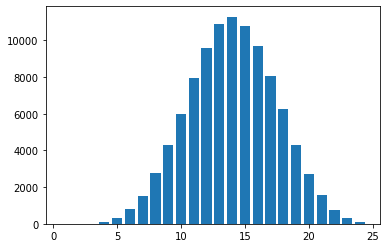

In [44]:
# 4xd6
quick_dice_histo(100000, 4, 6)

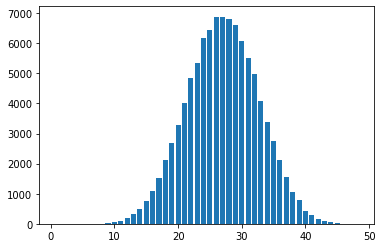

In [45]:
# 6xd8
quick_dice_histo(100000, 6, 8)